In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [68]:
seed =10
N = 500
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 2
t = np.arange(0,9000,0.1)
K = 6
sum_time = 1500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)

In [47]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)


In [10]:
# theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# qomega = np.sort(omega)-np.mean(omega)

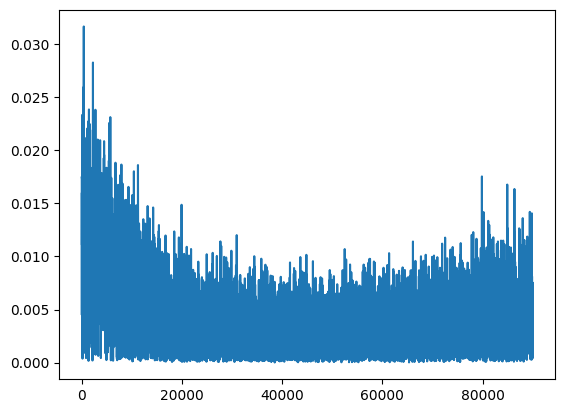

In [69]:
plt.plot(rs)

In [27]:
mean_r

0.6472778354971225

In [65]:
region = rs[-5000:]
mean_r = np.mean(region)
print(mean_r)
max_r,min_r = np.max(region),np.min(region)

0.6416863456440697


In [66]:
O_p = lambda Kr,m=m: (4/np.pi)*np.sqrt(Kr/m)
r_p = lambda O,K=K,m=m: (np.pi/4)**2*m/K*O

-0.05047924903498999
0.05045928153465682
-1.3344829117761503
-0.2920382233560805
0.40647146520535743
1.1160029715770388


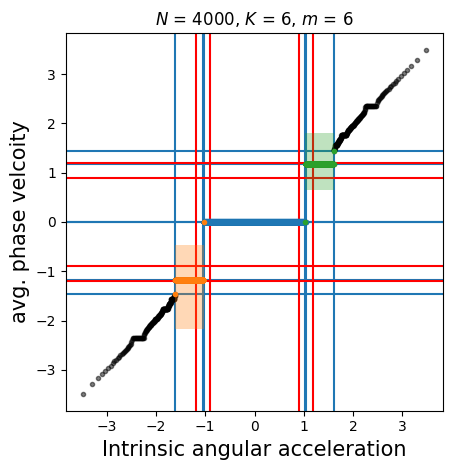

In [67]:
a_dtheta = np.sort(avg_dtheta[-1])
d_region = dtheta[-5000:]
for i,c in enumerate(cluster):
    c = np.sort(c)
    if i ==0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c],a_dtheta[c],'.')
    plt.axvline(omega[c[0]],zorder=-1)
    plt.fill_between([np.min(omega[c]),np.max(omega[c])],np.min(d_region[:,c]),np.max(d_region[:,c]),alpha=0.3)
    plt.axhline(a_dtheta[c[0]],zorder=-1)
    print(r_p(np.min(d_region[:,c])))
    print(r_p(np.max(d_region[:,c])))

    plt.axhline(a_dtheta[c[-1]],zorder=-1)
    plt.axvline(omega[c[-1]],zorder=-1)
plt.plot(omega,a_dtheta,'.',zorder=0,color ='black',alpha=0.5)
# plt.plot([omega[0],omega[-1]],[omega[0],omega[-1]],lw=5,zorder=0,alpha=0.4)
plt.axvline(O_p(K*min_r),color='red',zorder=0)
plt.axvline(O_p(K*max_r),color='red',zorder=0)
plt.axhline(O_p(K*min_r),color='red',zorder=0)
plt.axhline(O_p(K*max_r),color='red',zorder=0)

plt.axvline(-O_p(K*min_r),color='red',zorder=0)
plt.axvline(-O_p(K*max_r),color='red',zorder=0)
plt.axhline(-O_p(K*min_r),color='red',zorder=0)
plt.axhline(-O_p(K*max_r),color='red',zorder=0)
plt.gca().set_aspect('equal')
plt.xlabel(r'Intrinsic angular acceleration',fontsize=15)
plt.ylabel(r'avg. phase velcoity',fontsize=15)
plt.title(rf'$N$ = {N}, $K$ = {K}, $m$ = {m}')
plt.tight_layout()

In [70]:
2*(0.64+m)

13.28

In [ ]:
plt.plot(m,)

In [23]:
arg = np.argsort(dtheta[-1])

In [24]:
d_region.shape

(5000, 500)

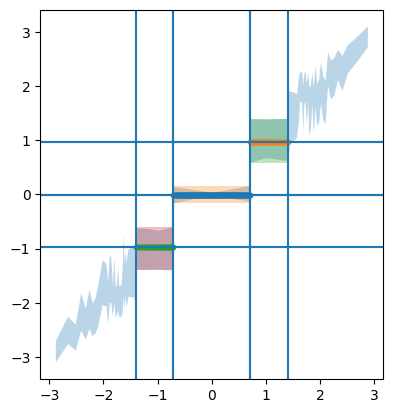

In [25]:
plt.fill_between(omega,np.min(d_region[:,arg],axis=0),np.max(d_region[:,arg],axis=0),alpha=0.3)

for i,c in enumerate(cluster):
    c = np.sort(c)
    if i ==0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c],a_dtheta[c],'.')
    plt.axvline(omega[c[0]])
    plt.fill_between([np.min(omega[c]),np.max(omega[c])],np.min(d_region[:,c]),np.max(d_region[:,c]),alpha=0.3)
    plt.axhline(a_dtheta[c[0]])

    plt.axhline(a_dtheta[c[-1]])
    plt.axvline(omega[c[-1]])
plt.gca().set_aspect('equal')

In [155]:
I,J = np.meshgrid(avg_dtheta[-1],avg_dtheta[-1])
A = I-J

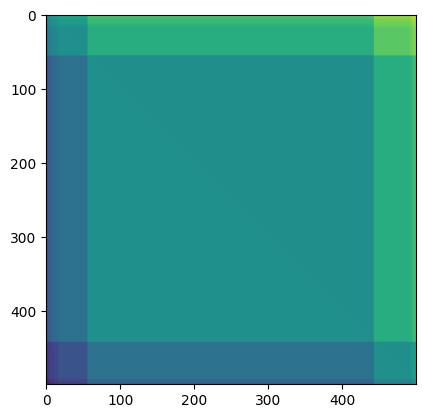

In [17]:
plt.imshow(A)

In [18]:
w,v = np.linalg.eig(A)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


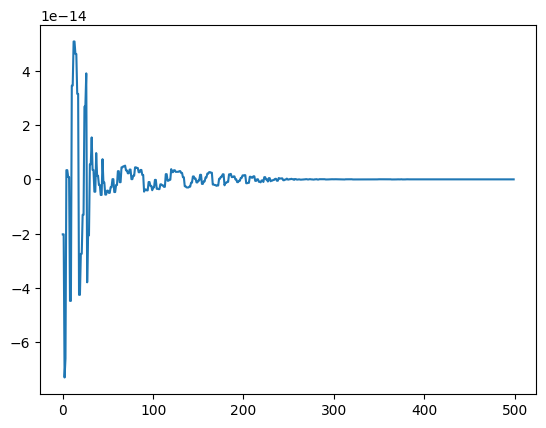

In [19]:
plt.plot(w)

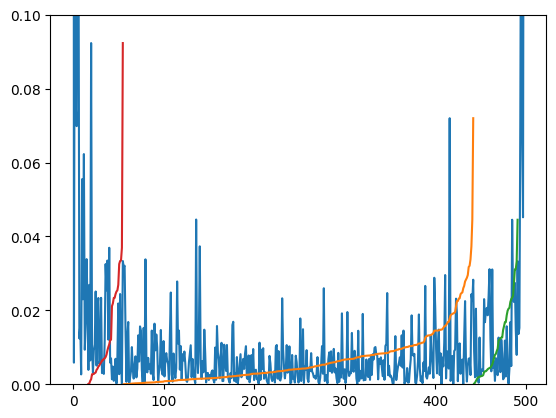

In [47]:
plt.plot(np.diff(omega))
plt.ylim(0,0.1)

for c in cluster:
    plt.plot(np.sort(c),np.sort(np.diff(omega)[c]))
    plt.ylim(0,0.1)

In [48]:
count,hist = np.histogram(omega,bins=20)

In [81]:
plt.hist([omega,qomega],bins=20,density=True)

NameError: name 'qomega' is not defined

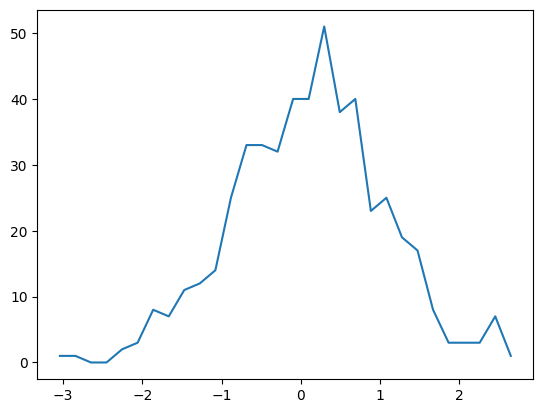

In [21]:
plt.plot(hist[1:],count)

## 09/19 cluster detection with other state $\Omega$

In [2]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso,cluster_os,C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [99]:
m = 2
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 4
seed = 100
N = 5000
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set,1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set,1))*np.zeros_like(omega))

for i in range(N_set):
    theta_init,omega,Kc = Normal(N,0,1,seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega
omega_sets = omega_sets_temp

# m = 10
t_end = 5000
dt =0.1
t = np.arange(0,t_end,dt)
theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m,N=N,K=K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))

In [100]:
rs_ = rs.T[0].T

In [101]:
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set,axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

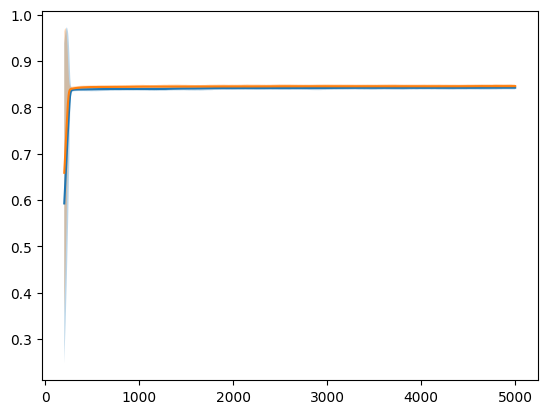

In [102]:
plt.plot(t[sum_time:],r_mean[:,7:9])
for i in range(7,9,1):
    plt.fill_between(t[sum_time:],(r_mean-r_std)[:,i],(r_mean+r_std)[:,i],alpha=0.3)


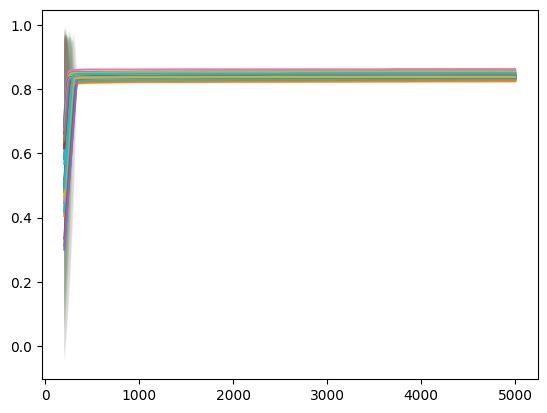

In [103]:
plt.plot(t[sum_time:],r_mean)
for i in range(N_set):
    plt.fill_between(t[sum_time:],(r_mean-r_std)[:,i],(r_mean+r_std)[:,i],alpha=0.1)

In [104]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = [] 
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean<0.1,1e-4,3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:,i]
    c_check = c_threshold[i]
    CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG,height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega_sets[i])

    CSO = np.array([(S,O) for S,O in zip(CS,CMP)],dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [105]:
C_0 = [] 
C_1 = [] 
C_2 = [] 

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A)>=3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A)==2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A)==1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A)==0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

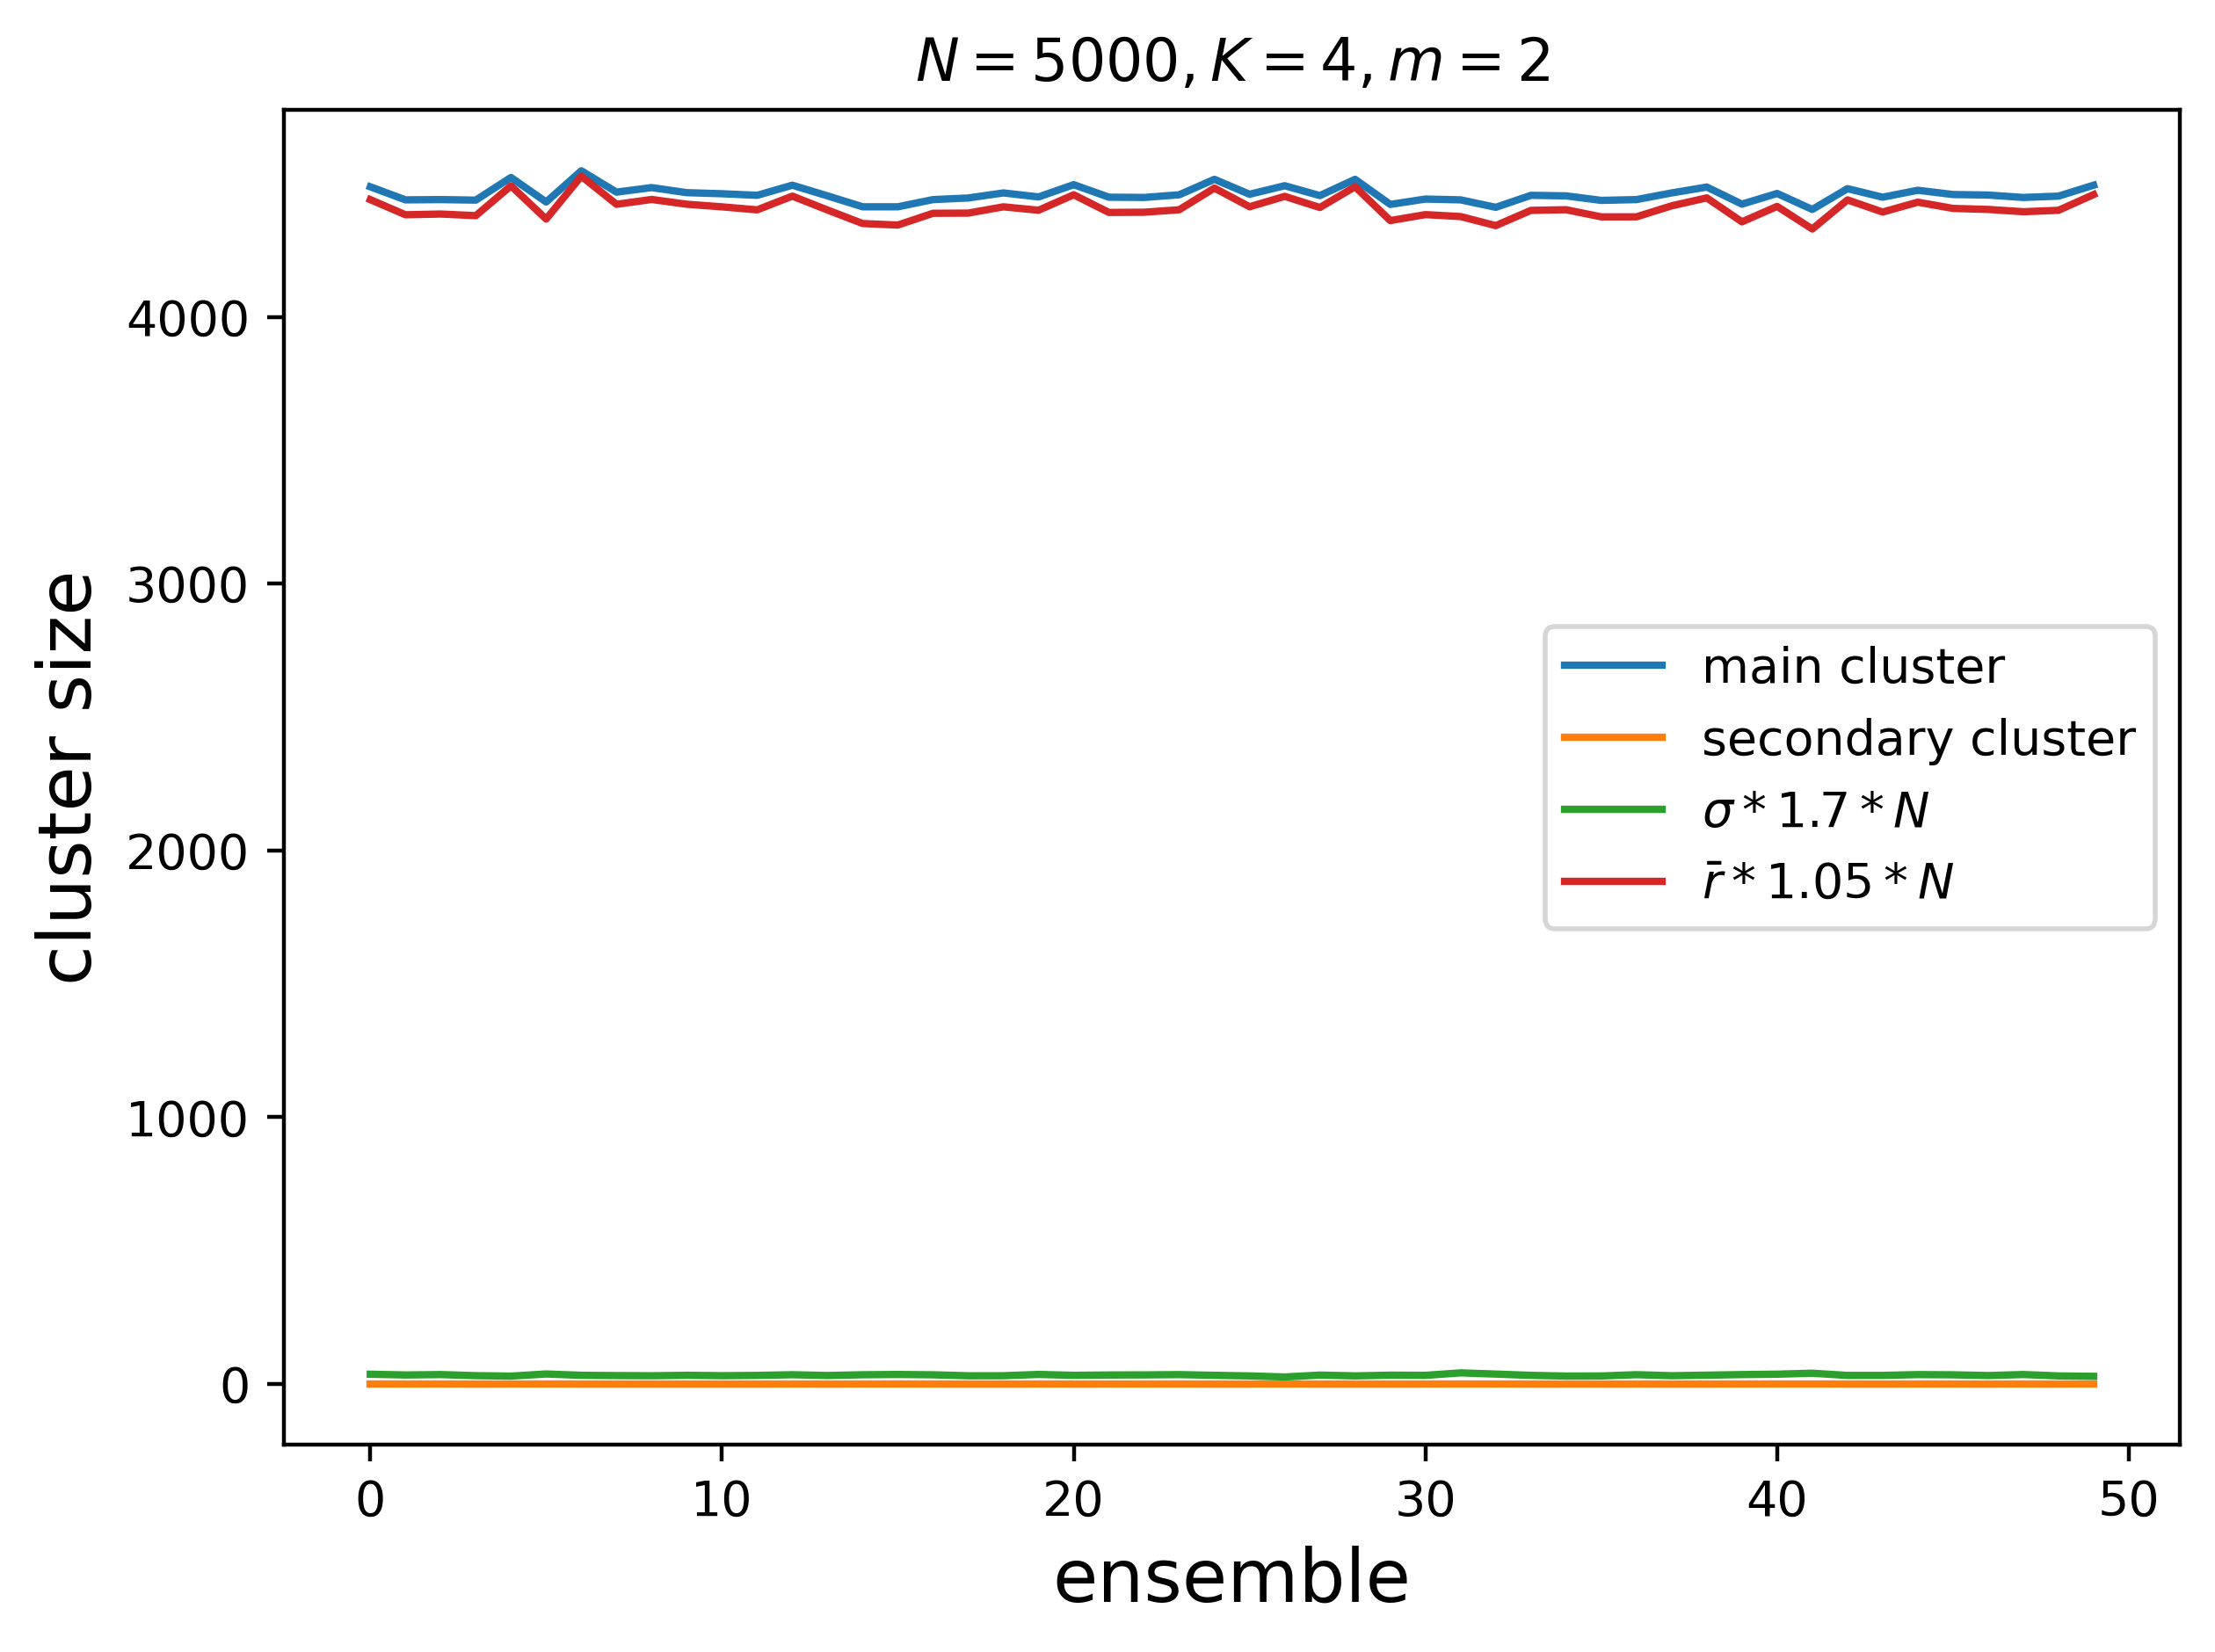

In [106]:
plt.figure(dpi=400)
plt.plot(np.array(C_0),label = 'main cluster')
plt.plot(np.array(C_1) + np.array(C_2),label ='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std[-1]*1.70*N,label =r'$\sigma*1.7*N$')
plt.plot(r_mean[-1]*1.05*N,label =r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size',fontsize=15)
plt.xlabel('ensemble',fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [122]:
1.08**10

2.158924997272788

(-2.0, 2.0)

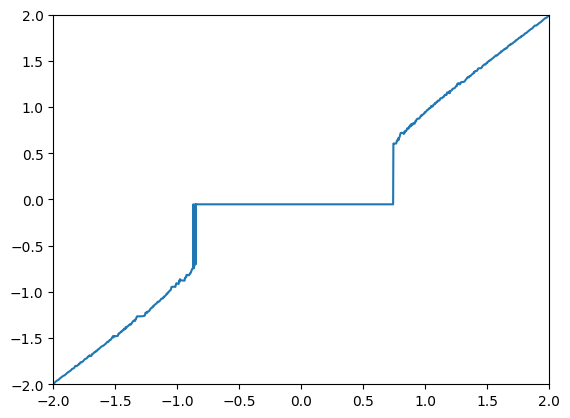

In [144]:
plt.plot(omega_sets[8].T,avg_dtheta_set[-1,8].T)
plt.xlim(-2,2)
plt.ylim(-2,2)

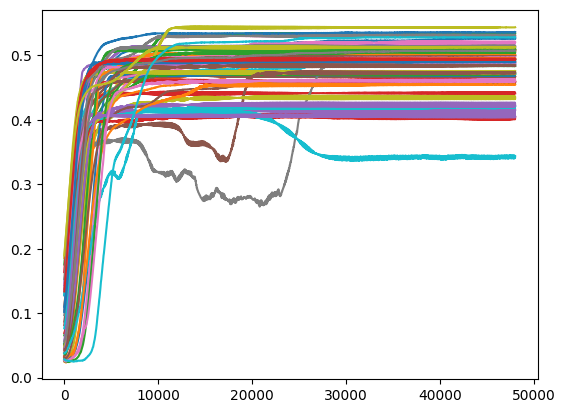

In [145]:
plt.plot(r_mean);

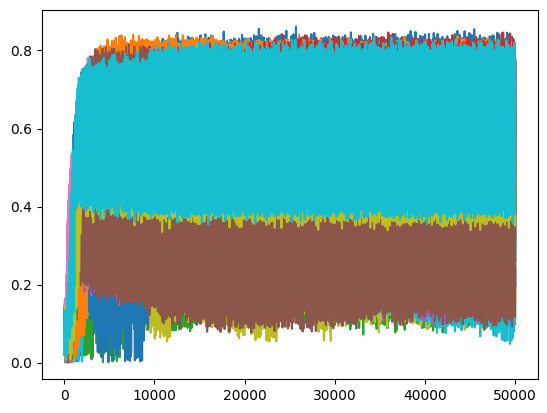

In [50]:
plt.plot(rs_);


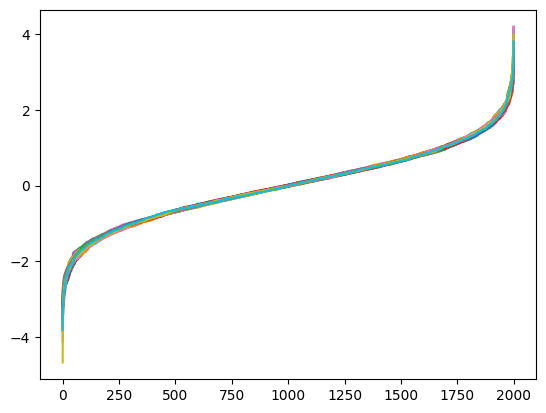

In [146]:
plt.plot(omega_sets_temp.T);

In [ ]:
for i in range(N_set):

In [4]:
omega_sets

(100, 500)

In [ ]:
seed =10
N = 8000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,9000,0.1)
K = 6
sum_time = 1500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)

In [ ]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)
